# NLP - Fake News Classification using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')

# Step 2: Lode Dataset

In [2]:
data = pd.read_csv("WELFake_Dataset.csv")
data.head()
# 1: real, 0: fake

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [3]:
data.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [4]:
data.shape

(72134, 4)

In [5]:
data["text"][0] # 1: real, 0: fake

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [6]:
data["text"][72133] # 1: real, 0: fake

'Goldman Sachs Endorses Hillary Clinton For President For Goldman Sachs, was there really any other choice this cycle? | October 27, 2016 Be Sociable, Share! Lloyd Blankfein, CEO of Goldman Sachs, is greeted by Hillary Clinton at a panel discussion at the Clinton Global Initiative, Sept. 24, 2014 in New York. \nPublished in partnership with Shadowproof . \nHe’s with her. On Sunday, former Secretary of State Hillary Clinton earned the endorsement of Goldman Sachs CEO Lloyd Blankfein —an endorsement she had been working toward for years. \nAs was revealed by Wikileaks, Hillary Clinton spent the run up to her presidential campaign giving speeches to Goldman Sachs and other Wall Street banks, where she praised their talents and explained her positions on financial regulation. \nOn October 24, 2013, Clinton told Goldman Sachs that Dodd-Frank had to be done mostly for “political reasons” because Congress needed to look like it was doing something about the crisis. She said, “There’s nothing 

In [7]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
data.isnull().sum()

title    558
text      39
label      0
dtype: int64

# Step 3: Handle null values separate features from labels

In [10]:
data.fillna(" ", inplace=True)
features = data[["text", "title"]]
labels = data["label"]

In [11]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [12]:
label_status = data["label"].value_counts()
transactions = label_status.index
quentity = label_status.values
# quentity
figure = px.pie(data, 
                values=quentity,
                names=["Real News", "Fake News"], 
                hole=0.60,
                title="Distribution of Real and Fake News")
figure.show()

# Step 4: Create Word Cloud

In [13]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
fake_text = " ".join(data[data["label"] == 0 ]["text"])
real_text = " ".join(data[data["label"] == 1 ]["text"])

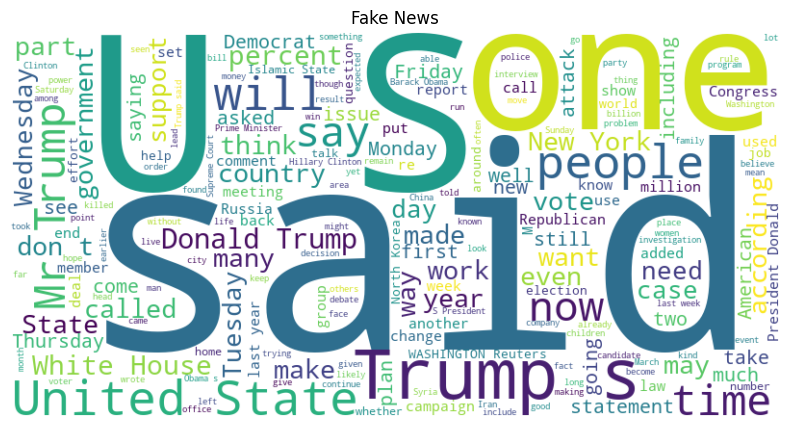

In [14]:
plot_wordcloud(fake_text, "Fake News")
plt.show()

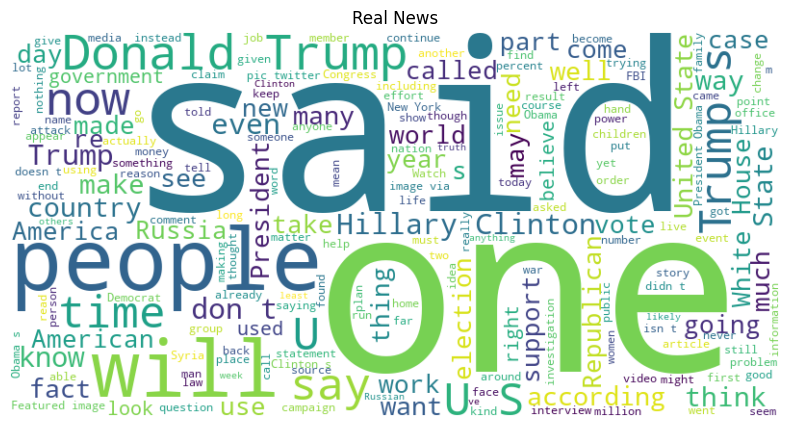

In [15]:
plot_wordcloud(real_text, "Real News")
plt.show()

# Step 5: Data Preprocessing

In [16]:
text_column = "text"
label_column = "label"

In [17]:
import nltk
nltk.download('stopwords')
stopword = set(stopwords.words("english"))
stopword

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [18]:
stopword.__len__()

198

In [19]:
stopwords.fileids()

['albanian',
 'arabic',
 'azerbaijani',
 'basque',
 'belarusian',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'tamil',
 'turkish',
 'uzbek']

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def preprocess_text(text):
    # remove punctuation
    remove_punc = [char for char in text if char not in string.punctuation]
    clean_word = "".join(remove_punc) # join the characters to form the cleaned text
    # Remove stopwords
    text = ([word for word in clean_word.split() if word.lower() not in stopword]) # split the text into words and remove stopwords
    return text

In [22]:
data[text_column] = data[text_column].apply(preprocess_text)

In [23]:
data[text_column]

0        [comment, expected, Barack, Obama, Members, FY...
1                          [post, votes, Hillary, already]
2        [demonstrators, gathered, last, night, exercis...
3        [dozen, politically, active, pastors, came, pr...
4        [RS28, Sarmat, missile, dubbed, Satan, 2, repl...
                               ...                        
72129    [WASHINGTON, Reuters, Hackers, believed, worki...
72130    [know, fantasyland, Republicans, never, questi...
72131    [Migrants, Refuse, Leave, Train, Refugee, Camp...
72132    [MEXICO, CITY, Reuters, Donald, Trump’s, comba...
72133    [Goldman, Sachs, Endorses, Hillary, Clinton, P...
Name: text, Length: 72134, dtype: object

# Step 6: Lemmatization

In [24]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

def lemmatize_text(text):
    lemmatized_text = " ".join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text
data[text_column] = data[text_column].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sahor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
data[text_column]

0        comment expected Barack Obama Members FYF911 F...
1                                post vote Hillary already
2        demonstrator gathered last night exercising co...
3        dozen politically active pastor came private d...
4        RS28 Sarmat missile dubbed Satan 2 replace SS1...
                               ...                        
72129    WASHINGTON Reuters Hackers believed working Ru...
72130    know fantasyland Republicans never questioned ...
72131    Migrants Refuse Leave Train Refugee Camp Hunga...
72132    MEXICO CITY Reuters Donald Trump’s combative s...
72133    Goldman Sachs Endorses Hillary Clinton Preside...
Name: text, Length: 72134, dtype: object

# Step 6: TF-IDF Vectorization

In [26]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data[text_column])
y = data[label_column]

In [27]:
x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14808182 stored elements and shape (72134, 363127)>

# Step 8: Split the data into training and testing sets

In [28]:
labels

0        1
1        1
2        1
3        0
4        1
        ..
72129    0
72130    1
72131    0
72132    0
72133    1
Name: label, Length: 72134, dtype: int64

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size=0.3, random_state=42)

# Step 09: Evaluate Naive Bayes Model

In [30]:
from sklearn.metrics import precision_recall_curve, auc
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    prob = model.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, prob)
    fpr, tpr, thresholds = roc_curve(y_test, prob)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, prob)
    pr_auc = auc(recall_curve, precision_curve)
    return {
        "accuracy": accuracy,
        "confusion_matrix": cm,
        "roc_auc": roc_auc,
        "fpr": fpr,
        "tpr": tpr,
        "precision": precision_curve,
        "recall": recall_curve,
        "pr_auc": pr_auc
    }

# Step 10: Build Naive Bayes Models

## Multinomial Nive Bayes

In [31]:
mnb_model = MultinomialNB()
mnb_model.fit(x_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [32]:
nb_results = evaluate_model(mnb_model, x_test, y_test)
pd.Series(nb_results)

accuracy                                                     0.876669
confusion_matrix                          [[9713, 900], [1769, 9259]]
roc_auc                                                      0.948853
fpr                 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
tpr                 [0.0, 9.067827348567283e-05, 0.000272034820457...
precision           [0.5095882815027032, 0.5096118299445471, 0.509...
recall              [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
pr_auc                                                       0.948201
dtype: object

# Evaluate Manually

In [33]:
cm = confusion_matrix(y_test, mnb_model.predict(x_test))
cm

array([[9713,  900],
       [1769, 9259]])

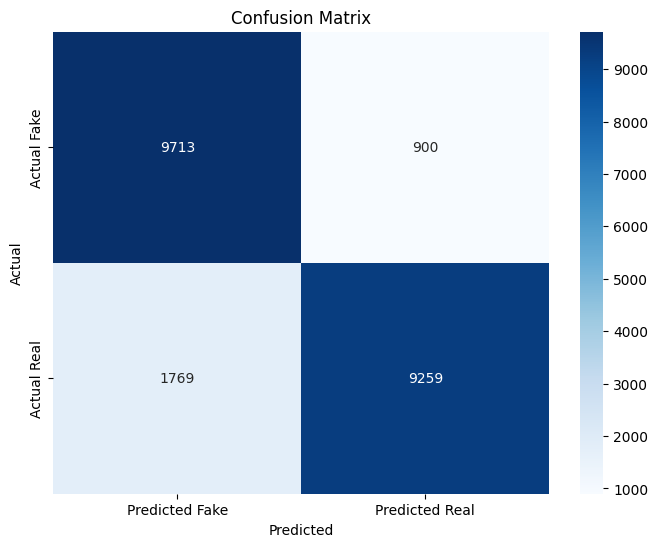

In [34]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Fake", "Predicted Real"],
            yticklabels=["Actual Fake", "Actual Real"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

In [35]:
print(classification_report(y_test, mnb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10613
           1       0.91      0.84      0.87     11028

    accuracy                           0.88     21641
   macro avg       0.88      0.88      0.88     21641
weighted avg       0.88      0.88      0.88     21641



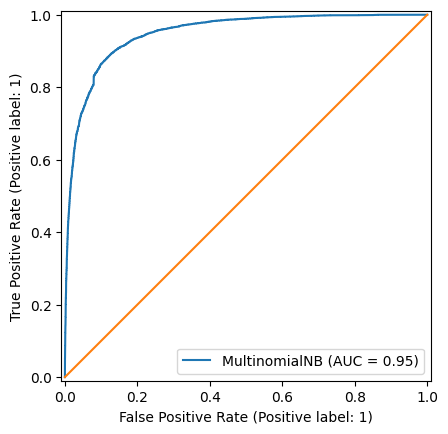

In [36]:
RocCurveDisplay.from_estimator(mnb_model, x_test, y_test)

plt.plot([0, 1], [0, 1])
plt.show()

# Bernoulli Naive Bayes

In [37]:
bnb_model = BernoulliNB()
bnb_model.fit(x_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"binarize binarize: float or None, default=0.0Threshold for binarizing (mapping to booleans) of sample features.If None, input is presumed to already consist of binary vectors.",0.0
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [38]:
bnb_results = evaluate_model(bnb_model, x_test, y_test)
pd.Series(bnb_results)

accuracy                                                     0.854766
confusion_matrix                         [[8575, 2038], [1105, 9923]]
roc_auc                                                      0.941891
fpr                 [0.0, 0.007726373315744842, 0.0080090455102233...
tpr                 [0.0, 0.6203300689154878, 0.6206927820094306, ...
precision           [0.5095882815027032, 0.5096118299445471, 0.509...
recall              [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
pr_auc                                                       0.952773
dtype: object

In [39]:
cm_bnb = confusion_matrix(y_test, bnb_model.predict(x_test))
cm_bnb

array([[8575, 2038],
       [1105, 9923]])

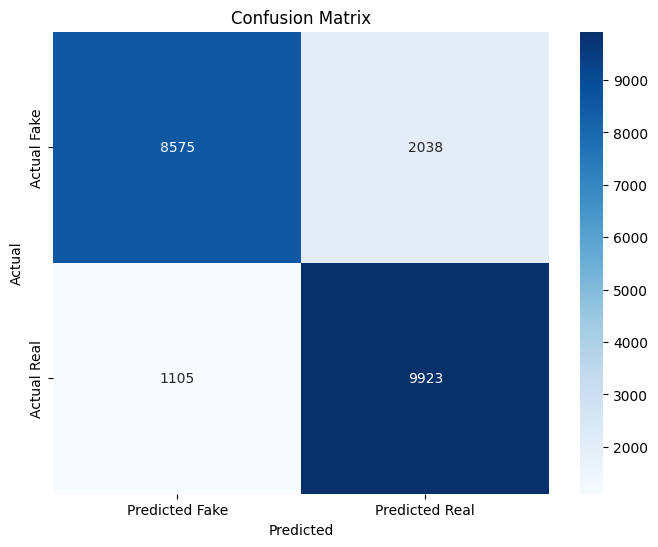

In [40]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Fake", "Predicted Real"],
            yticklabels=["Actual Fake", "Actual Real"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

In [41]:
print(classification_report(y_test, bnb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     10613
           1       0.83      0.90      0.86     11028

    accuracy                           0.85     21641
   macro avg       0.86      0.85      0.85     21641
weighted avg       0.86      0.85      0.85     21641



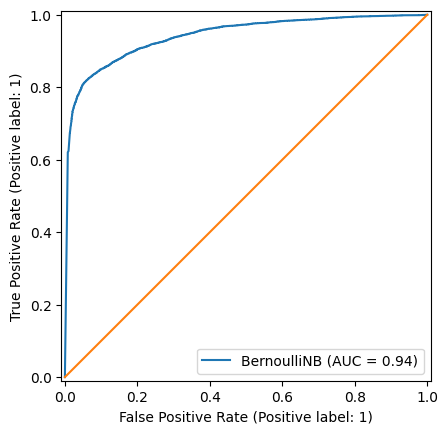

In [42]:
RocCurveDisplay.from_estimator(bnb_model, x_test, y_test)

plt.plot([0, 1], [0, 1])
plt.show()

# Applu Logistic Regression

In [43]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [44]:
lr_results = evaluate_model(lr_model, x_test, y_test)
pd.Series(lr_results)

accuracy                                                     0.950326
confusion_matrix                          [[9956, 657], [418, 10610]]
roc_auc                                                      0.989513
fpr                 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
tpr                 [0.0, 9.067827348567283e-05, 0.001360174102285...
precision           [0.5095882815027032, 0.5096118299445471, 0.509...
recall              [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
pr_auc                                                       0.989434
dtype: object

In [45]:
cm_lr = confusion_matrix(y_test, lr_model.predict(x_test))
cm_lr

array([[ 9956,   657],
       [  418, 10610]])

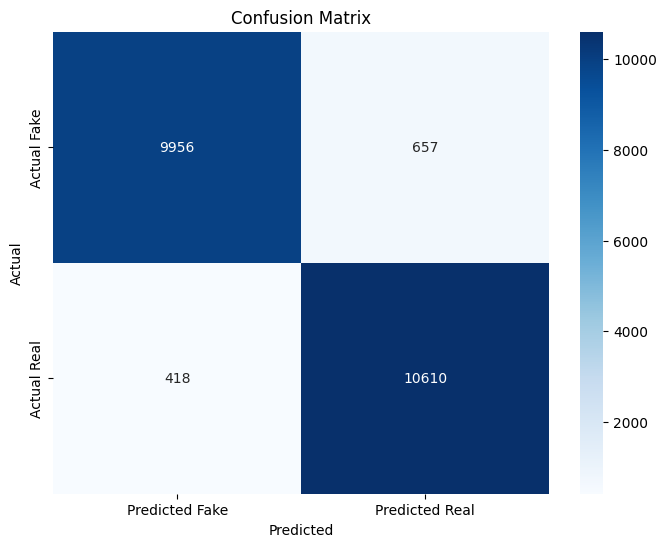

In [46]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Fake", "Predicted Real"],
            yticklabels=["Actual Fake", "Actual Real"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

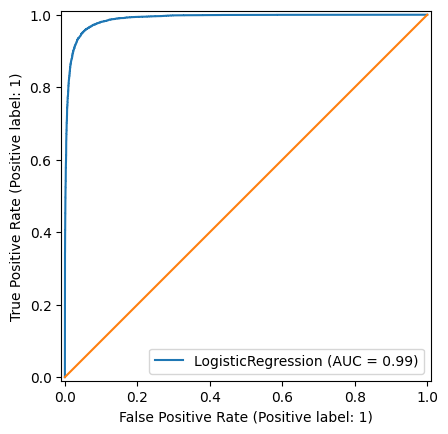

In [47]:
RocCurveDisplay.from_estimator(lr_model, x_test, y_test)
plt.plot([0, 1], [0, 1])
plt.show()

# Visualize performance of all models with histogram

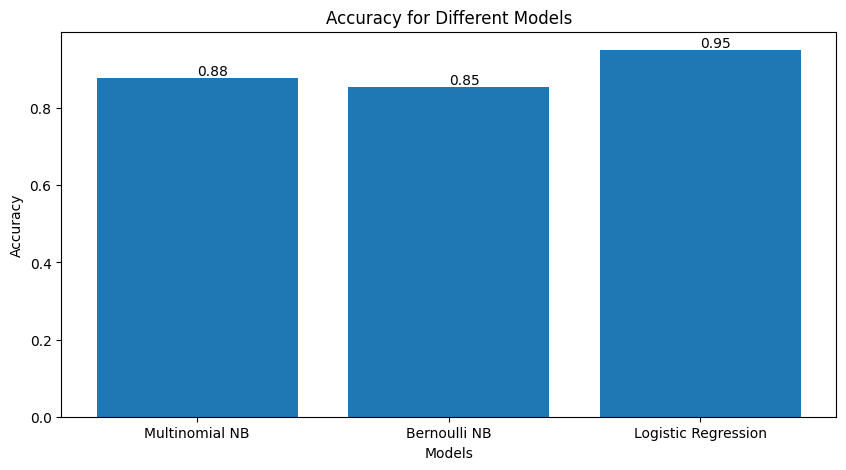

In [48]:
def plot_histogram(metric_values, model_name, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = plt.bar(model_name, metric_values)
    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} for Different Models")

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom') # va: vertical alignment

    plt.show()
accuracy_values = [nb_results["accuracy"], bnb_results["accuracy"], lr_results["accuracy"]]
model_names = ["Multinomial NB", "Bernoulli NB", "Logistic Regression"]
plot_histogram(accuracy_values, model_names, "Accuracy")

# Input Random text and make presiction

In [49]:
models = [mnb_model, bnb_model, lr_model]

In [50]:
random_text = """Breaking News: Scientists Discover Cure for Common Cold!
This groundbreaking discovery has the potential to revolutionize healthcare and improve the quality of life for millions of people worldwide. The research team, led by Dr. Jane Smith, has developed a novel approach that targets the root cause of the common cold, effectively eliminating the virus from the body within days. Clinical trials have shown promising results, with patients experiencing rapid recovery and minimal side effects. Health experts are optimistic about the implications of this discovery and are calling for further studies to validate the findings. Stay tuned for more updates on this exciting development in medical science!"""

preprocessed_text = preprocess_text(random_text) # Preprocess the text
lemmatized_text = lemmatize_text(preprocessed_text) # Lemmatize the text
vectorized_text = vectorizer.transform([lemmatized_text]) # Vectorize the text

In [51]:
preprocessed_text

['Breaking',
 'News',
 'Scientists',
 'Discover',
 'Cure',
 'Common',
 'Cold',
 'groundbreaking',
 'discovery',
 'potential',
 'revolutionize',
 'healthcare',
 'improve',
 'quality',
 'life',
 'millions',
 'people',
 'worldwide',
 'research',
 'team',
 'led',
 'Dr',
 'Jane',
 'Smith',
 'developed',
 'novel',
 'approach',
 'targets',
 'root',
 'cause',
 'common',
 'cold',
 'effectively',
 'eliminating',
 'virus',
 'body',
 'within',
 'days',
 'Clinical',
 'trials',
 'shown',
 'promising',
 'results',
 'patients',
 'experiencing',
 'rapid',
 'recovery',
 'minimal',
 'side',
 'effects',
 'Health',
 'experts',
 'optimistic',
 'implications',
 'discovery',
 'calling',
 'studies',
 'validate',
 'findings',
 'Stay',
 'tuned',
 'updates',
 'exciting',
 'development',
 'medical',
 'science']

In [52]:
lemmatized_text

'Breaking News Scientists Discover Cure Common Cold groundbreaking discovery potential revolutionize healthcare improve quality life million people worldwide research team led Dr Jane Smith developed novel approach target root cause common cold effectively eliminating virus body within day Clinical trial shown promising result patient experiencing rapid recovery minimal side effect Health expert optimistic implication discovery calling study validate finding Stay tuned update exciting development medical science'

In [53]:
vectorized_text

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 63 stored elements and shape (1, 363127)>

In [54]:
vectorized_text.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 363127))

In [55]:
for model in models:
    prediction = model.predict(vectorized_text)
    print(f"Model: {model.__class__.__name__}")
    print(f"Prediction: {prediction}\n")

Model: MultinomialNB
Prediction: [1]

Model: BernoulliNB
Prediction: [1]

Model: LogisticRegression
Prediction: [1]



In [68]:
# test for 0
random_text = """Exclusive Report: Celebrity Scandal Unveiled!
In a shocking turn of events, a well-known celebrity has been caught in a scandal that has
been going on for years. The news has been making headlines across the world and has
been causing a stir among the public. The investigation has been led by a team of experts
who have been working tirelessly to uncover the truth behind the scandal. The investigation
has revealed a web of deceit and betrayal, with many high-profile individuals being implicated
in the scandal. The investigation has uncovered a series of damning evidence that has been
shared with the authorities, leading to multiple arrests and legal proceedings. The public       
is being kept informed and updated on the latest developments in the scandal, with the
news making headlines across the globe. The investigation has been led by a team of experts
who have been working tirelessly to uncover the truth behind the scandal. The investigation
has revealed a web of deceit and betrayal, with many high-profile individuals being implicated
in the scandal. The investigation has uncovered a series of damning evidence that has been
shared with the authorities, leading to multiple arrests and legal proceedings. The public
is being kept informed and updated on the latest developments in the scandal, with the
news making headlines across the globe."""
preprocessed_text = preprocess_text(random_text) # Preprocess the text
lemmatized_text = lemmatize_text(preprocessed_text) # Lemmatize the text

In [69]:
vectorized_text = vectorizer.transform([lemmatized_text]) # Vectorize the text
vectorized_text.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 363127))

In [70]:
for model in models:
    prediction = model.predict(vectorized_text)
    model_name = type(model).__name__
    result = "Real News" if prediction[0] == 1 else "Fake News"
    print(f"{model_name} Prediction: {result}\n")
    print(prediction)

MultinomialNB Prediction: Real News

[1]
BernoulliNB Prediction: Real News

[1]
LogisticRegression Prediction: Real News

[1]


# save good model

In [71]:
import pickle
pickle.dump(mnb_model, open("mnb_model.pkl", "wb"))
pickle.dump(bnb_model, open("bnb_model.pkl", "wb"))
pickle.dump(lr_model, open("logistic_model.pkl", "wb"))

In [72]:
# load models
mnb_model = pickle.load(open("mnb_model.pkl", "rb"))
bnb_model = pickle.load(open("bnb_model.pkl", "rb"))
lr_model = pickle.load(open("logistic_model.pkl", "rb"))

In [73]:
lr_model.predict(x_test)

array([1, 1, 0, ..., 1, 1, 0], shape=(21641,))

In [74]:
lr_model.score(x_test, y_test)

0.9503257705281641

In [75]:
lr_model.predict(vectorized_text)

array([1])